In [2]:
import pandas as pd


df =pd.read_csv("predictive_maintenance.csv")

df = df.drop(['date','device','metric8'],axis=1)

In [3]:
df[400:405]

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
400,0,183223080,0,0,0,8,221181,0,1
401,0,96811064,0,0,0,8,273108,0,0
402,0,140213216,0,0,0,16,318008,0,0
403,0,46683120,0,0,6,7,198518,0,0
404,0,35488968,0,0,0,9,200930,0,0


In [4]:
X= df.drop(['failure'],axis=1)
X

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
0,215630672,56,0,52,6,407438,0,7
1,61370680,0,3,0,6,403174,0,0
2,173295968,0,0,0,12,237394,0,0
3,79694024,0,0,0,6,410186,0,0
4,135970480,0,0,0,15,313173,0,3
...,...,...,...,...,...,...,...,...
124489,18310224,0,0,0,10,353705,8,0
124490,172556680,96,107,4,11,332792,0,13
124491,19029120,4832,0,0,11,350410,0,0
124492,226953408,0,0,0,12,358980,0,0


In [5]:
y=df.failure
y.value_counts()

0    124388
1       106
Name: failure, dtype: int64

### Imblearn relying on sklearn 
- imbalenced learn used to over sample
- helps in dealing with classification with imbalanced classes.

In [6]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

In [7]:
X_resampled

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
0,215630672,56,0,52,6,407438,0,7
1,61370680,0,3,0,6,403174,0,0
2,173295968,0,0,0,12,237394,0,0
3,79694024,0,0,0,6,410186,0,0
4,135970480,0,0,0,15,313173,0,3
...,...,...,...,...,...,...,...,...
248771,22646880,0,0,58,12,244253,0,0
248772,97170872,2576,0,60,12,462175,0,0
248773,222122448,520,0,0,8,218975,176,0
248774,91542544,0,2,0,12,265506,16,41


In [8]:
X_resampled

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
0,215630672,56,0,52,6,407438,0,7
1,61370680,0,3,0,6,403174,0,0
2,173295968,0,0,0,12,237394,0,0
3,79694024,0,0,0,6,410186,0,0
4,135970480,0,0,0,15,313173,0,3
...,...,...,...,...,...,...,...,...
248771,22646880,0,0,58,12,244253,0,0
248772,97170872,2576,0,60,12,462175,0,0
248773,222122448,520,0,0,8,218975,176,0
248774,91542544,0,2,0,12,265506,16,41


In [9]:
y_resampled.value_counts()

0    124388
1    124388
Name: failure, dtype: int64

In [10]:
import numpy as np

X = X_resampled
y_resampled

l2_norms = np.linalg.norm(X, axis=1, ord=2)

l2_norms.shape

(248776,)

In [11]:
X_normalized = X / l2_norms[:, np.newaxis]

In [12]:
X_normalized.shape

(248776, 8)

- X_normalized : Resampled normalized data.
- y_resempled  : Resampled Y (Target Variable)

# Modeling

In [13]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix
import matplotlib.pyplot as plt


# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_resampled, test_size=0.2, random_state=42)

In [14]:
# Instantiate the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the Decision Tree classifier
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
# Predict probabilities of positive class for test set
y_score = dt_classifier.predict_proba(X_test)[:, 1]

y_score

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.95005203])

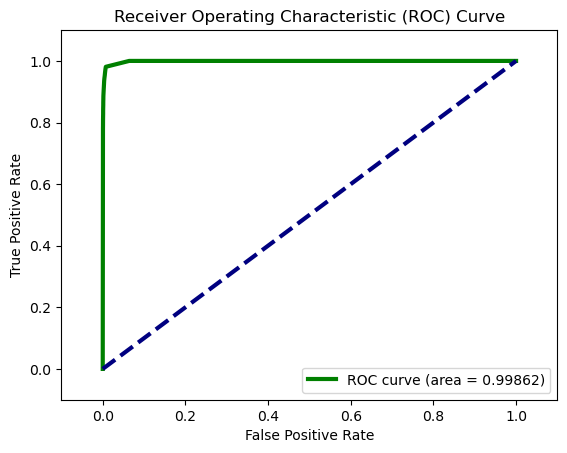

In [71]:
# Compute ROC curve and ROC area
fpr, tpr ,_= roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green',linestyle='-', lw=3, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [72]:
y_pred = dt_classifier.predict(X_test)
classification_rep2 = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep2)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     24752
           1       0.99      0.98      0.99     25004

    accuracy                           0.99     49756
   macro avg       0.99      0.99      0.99     49756
weighted avg       0.99      0.99      0.99     49756



# Conclusion
### Decision Tree Classifier works better in classifieng in failure or non-failure of system